# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random as rd
from datetime import datetime, timedelta

# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Input Zip (CSV)
input_zip_file = "zip.csv"
# Input Project File
input_project_file = "PI_NEWandOLD.csv" 
PROJECT_01_MAPPING = 'resources/raw_data_next_gen/admin_projects.csv'

# API Calls Configuration
daily_url = "https://api.meteostat.net/v1/history/daily?"
station_url = 'https://api.meteostat.net/v1/stations/nearby?'

units = "metric"

#Query base
#query_url = f"{url}appid={wkey}&units={units}&q="

In [24]:
############################################
##  Create Lat_Lon DataFrame
###########################################
LL_DF = pd.read_csv(input_zip_file, encoding='utf-8',dtype = {'zip': 'str'}, low_memory=False)
PR_DF = pd.read_csv(input_project_file, encoding='utf-8', low_memory=False)
P1_DF = pd.read_csv(PROJECT_01_MAPPING, encoding='utf-8', low_memory=False)

In [3]:
P1_DFFormatted = "{:0>5}"

LL_DF.zip = LL_DF.zip.apply(lambda x: Formatted.format(x))


In [4]:
#LL_DF

In [5]:
LL_DF

,zip,latitude,longitude,city,state,county,other_info
0,00501,40.9223,-72.6371,Holtsville,NY,Suffolk,UNIQUE
1,00544,40.9223,-72.6371,Holtsville,NY,Suffolk,UNIQUE
2,00601,18.1653,-66.7226,Adjuntas,PR,Adjuntas,STANDARD
3,00602,18.3931,-67.1810,Aguada,PR,Aguada,STANDARD
4,00603,18.4559,-67.1457,Aguadilla,PR,Aguadilla,STANDARD
...,...,...,...,...,...,...,...
42738,99927,55.5179,-132.0030,Point Baker,AK,Prince Wales Ketchikan,PO BOX ONLY
42739,99928,55.3954,-131.6750,Ward Cove,AK,Ketchikan Gateway,PO BOX ONLY
42740,99929,56.4499,-132.3640,Wrangell,AK,Wrangell Petersburg,PO BOX ONLY
42741,99950,55.5420,-131.4330,Ketchikan,AK,Ketchikan Gateway,STANDARD


In [6]:
PR_DF.head()
PR_LOC_DF = PR_DF[['name','job_number', 'postal_code', 'city']]

In [7]:
PR_LOC_DF.count()

name           159285
job_number     107153
postal_code    118687
city           123203
dtype: int64

In [8]:
PR_LOC_DF = PR_LOC_DF[PR_LOC_DF['postal_code'].notna()]

In [9]:
#PR_ZIP_SER = PR_LOC_DF['postal_code'].unique()
PR_JOB_SER = PR_LOC_DF['name'].unique()

In [10]:
#PR_JOB_SER

In [11]:
len(PR_JOB_SER)
len(PR_LOC_DF['name'].unique())

111

In [12]:
#PR_JOB_SER

In [13]:
len(PR_LOC_DF['name'].unique())
PR_ZIP_LIST = []
PR_JOB_LIST = []
PR_CITIES_LIST = []
##################################################################################
###   DEFINE NEW DATAFRAME
##################################################################################
W_DF = pd.DataFrame(columns=['zip','latitude','longitude','city','state','county','name'])

for i in range (0, len(PR_LOC_DF['name'].unique())):
    TEMP_DF = PR_DF.loc[PR_DF['name']== PR_JOB_SER[i]]
    TEMP_DF['postal_code'].dropna()
    for each in (TEMP_DF['postal_code'].unique()):
        PR_CITY_LIST = []
        ZIP_CODE =str(each).strip()
        if (len(ZIP_CODE) == 3):
            ZIP_LOOK = '00' + ZIP_CODE
        elif (len(ZIP_CODE) == 4):
            ZIP_LOOK = '0' + ZIP_CODE
        else:
            ZIP_LOOK = ZIP_CODE
        #print (ZIP_LOOK)    
        if (len(ZIP_LOOK) > 4):  
            PR_ZIP_LIST.append(ZIP_LOOK)
            PR_JOB_LIST.append(PR_JOB_SER[i])
            ZIP_CHECK = ((LL_DF.loc[LL_DF['zip'] == ZIP_LOOK]).values.tolist()) 
            #print(ZIP_CHECK,'------', ZIP_LOOK)
            PR_CITY_LIST= ZIP_CHECK[0]
            PR_CITY_LIST.append(PR_JOB_SER[i])
            #print(PR_CITY_LIST[0])
            W_DF = W_DF.append({'zip':PR_CITY_LIST[0],
                                 'latitude':PR_CITY_LIST[1],
                                 'longitude':PR_CITY_LIST[2],
                                 'city':PR_CITY_LIST[3],
                                 'state':PR_CITY_LIST[4],
                                 'county':PR_CITY_LIST[5],
                                 'name':PR_CITY_LIST[7]}, ignore_index=True)
            #W_DF.append(PR_CITY_LIST, ignore_index=True)
            

In [14]:
type(W_DF)
W_DF.to_csv('Projects_Lon_Lat.csv')

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities by ZIP
WS_LIST = []
#city = []


#lat_lngs = zip(lats, lngs)
for index, row in W_DF.iterrows():
    station_call = station_url + 'lat=' + str(row['latitude']) + '&lon='+ str(row['longitude']) + '&limit=1&key=' + wkey
    response = requests.get(station_call).json()
    #print(response['data'][0]['id'])
    WS_LIST.append(response['data'][0]['id'])

In [18]:
WS_LIST

['KEKY0',
 'KUNV0',
 'KCPS0',
 '72401',
 'KARB0',
 'KCPS0',
 'KSET0',
 'KCMI0',
 'KPWK0',
 'KCPS0',
 'KCPS0',
 'KCPS0',
 'KCPS0',
 'KCPS0',
 'KNY00',
 'KCPS0',
 'KHZL0',
 'KSPA0',
 'KFYG0',
 'KCGF0',
 'KSUS0',
 'KSUS0',
 'KSET0',
 'KJVL0',
 '72790',
 '72013',
 'KMMI0',
 'KCPS0',
 'KUGN0',
 'KSUS0',
 'KIGQ0',
 'KCMI0',
 '72440',
 '72534',
 'KCPS0',
 '72534',
 'KCCO0',
 'KMRB0',
 'KCPS0',
 'K19A0',
 '72323',
 '72401',
 'KMAN0',
 '72534',
 'KMTN0',
 'KF460',
 '72278',
 'KSUS0',
 'KUNV0',
 '74207',
 'KCCO0',
 'KMAO0',
 '72534',
 '72399',
 '72441',
 'KENW0',
 'KGMU0',
 'KUNV0',
 'KCPS0',
 'KCMI0',
 'KPTK0',
 '74207',
 'KFYV0',
 'KCPS0',
 'KCPS0',
 'KLOT0',
 'KEYE0',
 '72534',
 'KSET0',
 '72013',
 'KCPS0',
 'KCPS0',
 '72429',
 '72543',
 'KTOA0',
 '72534',
 '72247',
 '69014',
 'KPTK0',
 'KCPS0',
 'KMMI0',
 'KVTA0',
 'KCPS0',
 'KRZR0',
 '72534',
 '72530',
 'KUNV0',
 '72651',
 'KSPA0',
 'KCGF0',
 'KBFM0',
 '72534',
 '72324',
 'KFTY0',
 'KCPS0',
 'KCPS0',
 'KSMF0',
 'KENW0',
 '74207',
 'KMPO0',


In [19]:
W_DF['Weather_Stations'] = WS_LIST

In [20]:
W_DF.head()

,zip,latitude,longitude,city,state,county,name,Weather_Stations
0,35111,33.2997,-87.0489,Mc Calla,AL,Jefferson,Gestamp,KEKY0
1,16801,40.8819,-77.8678,State College,PA,Centre,10101855 - Penn State East Halls Phase 1A,KUNV0
2,63117,38.6295,-90.3342,Saint Louis,MO,Saint Louis,First Community CU,KCPS0
3,23219,37.5417,-77.4392,Richmond,VA,Richmond City,Gateway Plaza,72401
4,48103,42.2666,-83.8490,Ann Arbor,MI,Washtenaw,618 S. Main Street,KARB0


In [22]:
W_DF.to_csv('Projects_W_Lon_Lat.csv')

In [62]:
P1_DF.head()

,id,bim360_account_id,name,start_date,end_date,type,value,currency,status,job_number,...,city,state_or_province,postal_code,country,timezone,construction_type,contract_type,business_unit_id,last_sign_in,created_at
0,4fb9e8e5-f9a7-4a04-b33c-38f2227bf75d,49df69ab-c266-4d49-951c-031b16f7a31f,Amanda,2012-05-01 00:00:00,2115-01-01 00:00:00,Hospitals & Health Treatment Buildings,750000.0,USD,archived,NaN,...,St Louis,MO,63131,US,America/Chicago,NaN,NaN,NaN,NaN,2015-08-27 03:02:51.944348
1,e5ed857f-23f1-4a8c-a808-9cbfa0fe0648,49df69ab-c266-4d49-951c-031b16f7a31f,10100726-UCMC-GARAGE,2016-08-23 00:00:00,2021-08-24 00:00:00,Office,0.0,USD,archived,NaN,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,2016-08-24 01:51:54.201861
2,9d602269-4385-4d46-9d87-ee1374608e23,49df69ab-c266-4d49-951c-031b16f7a31f,10100726-UCMC,2016-08-23 00:00:00,2021-08-24 00:00:00,Office,0.0,USD,archived,NaN,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,2016-08-24 01:51:52.866017
3,003d373a-2b90-45f8-8a0e-862868dfdc0b,49df69ab-c266-4d49-951c-031b16f7a31f,BIM Test Ground,1915-01-01 00:00:00,2115-01-01 00:00:00,default,0.0,USD,archived,NaN,...,NaN,NaN,63114,US,America/Chicago,NaN,NaN,NaN,NaN,2015-08-27 03:03:02.549974
4,9fcfaa9b-b11e-47d9-acbb-a8a8ddf1f7ac,49df69ab-c266-4d49-951c-031b16f7a31f,"Thompson Coburn (ORD), Phase 3",2011-08-28 00:00:00,2115-01-01 00:00:00,Office & Bank Buildings,0.0,USD,archived,NaN,...,Chicago,IL,60603,US,America/Chicago,NaN,NaN,NaN,NaN,2015-08-27 03:03:27.170199


In [147]:
L_start_date = []
L_end_date = []
for index, row in W_DF.iterrows():
    Look_PR = row['name']
    start_date = (P1_DF[{'start_date'}].loc[P1_DF['name'] == Look_PR].values[0][0]).split()[0] #add start date
    end_date = (P1_DF[{'end_date'}].loc[P1_DF['name'] == Look_PR].values[0][0]).split()[0] #add end date
    today = datetime.today()
    #print(int (end_date.split('-')[0]))
#     start_date = (start_date.split('-')[0])
#     end_date = (end_date.split('-')[0])
#     if ( int(end_date.split('-')[0]) -  int(start_date.split('-')[0]) )>50:
#         old_end_year = int(end_date.split('-')[0])
#         end_date = str(int(end_date.split('-')[0])-100)
#         #print(end_date) 
    
    d_start_date = datetime.strptime(start_date, '%Y-%M-%d')
    d_end_date = datetime.strptime(end_date, '%Y-%M-%d')
    #if d_end_date 
    time_delta = d_end_date - d_start_date
    #print(time_delta, d_end_date, d_start_date)
    L_start_date.append(d_start_date.strftime('%Y-%M-%d'))
    L_end_date.append(d_end_date.strftime('%Y-%M-%d'))

In [148]:
W_DF['Start_date'] = L_start_date
W_DF['End_date']=L_end_date

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [150]:
#W_DF.to_csv('Projects_W_SD_ED_Lon_Lat.csv')

In [165]:
PROJECT_W_MAPPING = 'Projects_W_SD_ED_Lon_Lat.csv'
PW_DF = pd.read_csv(PROJECT_W_MAPPING, encoding='utf-8', low_memory=False)

In [172]:
WJSON_LIST = []
for index, row in PW_DF.iterrows():
    Look_W = row['Weather_Stations']
    Look_SD = row['Start_date']
    Look_ED = row['End_date']
    #print(Look_W, Look_SD, Look_ED)
    waether_call=daily_url + 'station=' + Look_W + '&start='+ Look_SD + '&end=' + Look_ED +'&key=' + wkey
    print(waether_call)
    response = requests.get(waether_call).json()
    #print(response)
    WJSON_LIST.append(response)
PW_DF['P_WEATHER'] = WJSON_LIST

PW_DF.to_csv('TON_OF_DATA.csv')


https://api.meteostat.net/v1/history/daily?station=KEKY0&start=2016-08-01&end=2016-12-30&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KUNV0&start=2016-01-01&end=2017-08-14&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCPS0&start=2013-05-01&end=2015-01-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=72401&start=2013-07-01&end=2015-01-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KARB0&start=2013-05-01&end=2015-01-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCPS0&start=2017-03-15&end=2027-03-15&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KSET0&start=2017-07-18&end=2018-05-18&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCMI0&start=2013-11-01&end=2015-01-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KPWK0&start=2019-05-07&end=2020-05-07&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCPS0&start=2012-02-20&end=2015

https://api.meteostat.net/v1/history/daily?station=KVTA0&start=2018-08-06&end=2019-04-15&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCPS0&start=2018-11-20&end=2019-11-20&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KRZR0&start=2017-12-15&end=2018-08-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=72534&start=2018-06-18&end=2019-12-01&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=72530&start=2018-10-29&end=2019-10-31&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KUNV0&start=2018-09-05&end=2019-12-31&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=72651&start=2017-11-01&end=2019-06-27&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KSPA0&start=2018-08-09&end=2018-12-31&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KCGF0&start=2017-08-21&end=2018-08-21&key=HDVaQdRv
https://api.meteostat.net/v1/history/daily?station=KBFM0&start=2018-01-22&end=2018

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
weather_dict = {
    'Citi': name,
    'Country' : country,
    'Latitude': lat,
    'Longitude' : lon,
    'Date' : date,
    'Maximum_Temp' : max_temp,
    'Current_Temp' : temp,
    'Humidity' : hum,
    'Wind_Speed' : ws,
    "Clouds" : clouds,  
}

In [70]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv('World_cities_weather_data.csv', encoding ='utf-8', index=False)

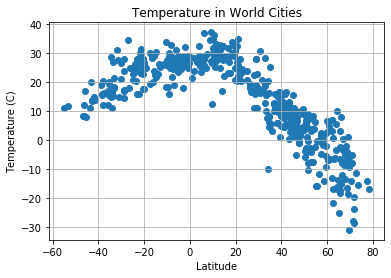

In [65]:
plt.scatter(weather_data['Latitude'],weather_data['Current_Temp'], marker="o")
plt.title('Temperature in World Cities')
plt.ylabel('Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Temperature_World_Cities.png")
plt.show()

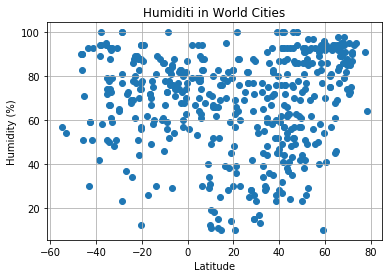

In [66]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], marker="o")
plt.title('Humiditi in World Cities')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Humidity_World_Cities.png")
plt.show()

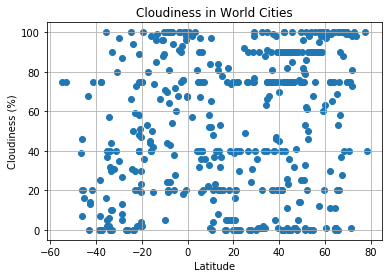

In [67]:
plt.scatter(weather_data['Latitude'],weather_data['Clouds'], marker="o")
plt.title('Cloudiness in World Cities')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Cloudiness_World_Cities.png")
plt.show()

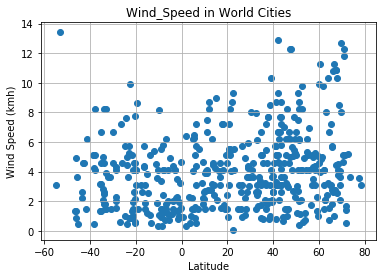

In [68]:
plt.scatter(weather_data['Latitude'],weather_data['Wind_Speed'], marker="o")
plt.title('Wind_Speed in World Cities')
plt.ylabel('Wind Speed (kmh)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Wind_Speed_World_Cities.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot